In [1]:
# ==============================================================
# Imports and Black-Scholes function
# ==============================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes function
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")


In [2]:
# ==============================================================
# Monte Carlo Simulation for European Options
# ==============================================================
def monte_carlo_price(S, K, T, r, sigma, M=100000, option_type='call', seed=42):
    """
    Calculate European Call or Put option price using Monte Carlo simulation.
    
    Parameters:
    S : float - Spot price
    K : float - Strike price
    T : float - Time to maturity
    r : float - Risk-free rate
    sigma : float - Volatility
    M : int - Number of simulations
    option_type : 'call' or 'put'
    seed : int - Random seed for reproducibility
    
    Returns:
    float - Option price
    """
    np.random.seed(seed)
    
    # Simulate terminal stock prices
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.randn(M))
    
    # Calculate payoffs
    if option_type == 'call':
        payoffs = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoffs = np.maximum(K - ST, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    # Discount average payoff
    price = np.exp(-r * T) * np.mean(payoffs)
    return price


Monte Carlo Prices vs Black-Scholes Reference:
M=  1000: Call=10.5166, Put=5.3215 | BS Call=10.4506, BS Put=5.5735
M=  5000: Call=10.4850, Put=5.5116 | BS Call=10.4506, BS Put=5.5735
M= 10000: Call=10.4502, Put=5.6017 | BS Call=10.4506, BS Put=5.5735
M= 50000: Call=10.4462, Put=5.5782 | BS Call=10.4506, BS Put=5.5735
M=100000: Call=10.4739, Put=5.5742 | BS Call=10.4506, BS Put=5.5735


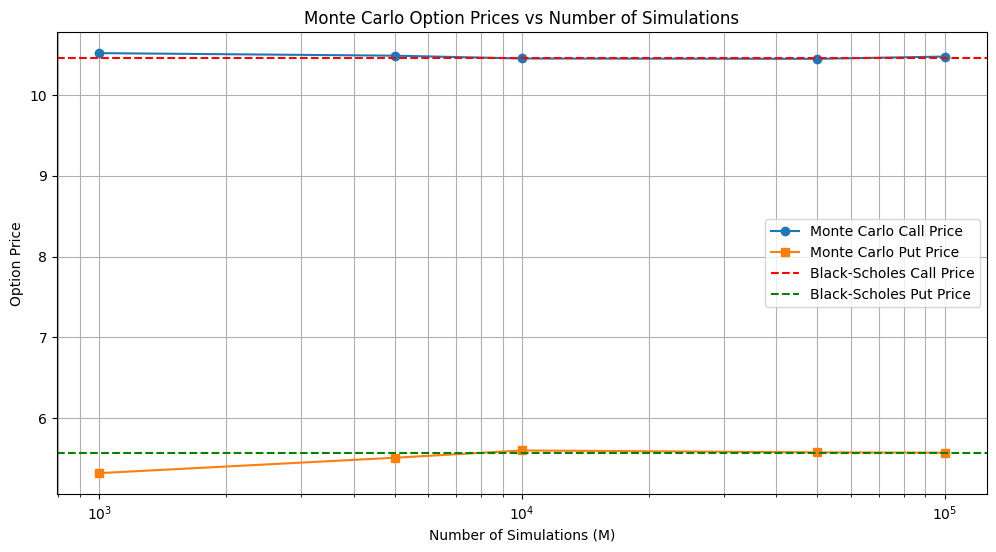

In [3]:
# ==============================================================
# Parameters
# ==============================================================
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2
M_values = [1000, 5000, 10000, 50000, 100000]  # Number of simulations

# Calculate Black-Scholes prices for reference
call_price_bs = black_scholes_price(S0, K, T, r, sigma, 'call')
put_price_bs = black_scholes_price(S0, K, T, r, sigma, 'put')

# Monte Carlo prices for different M
call_prices_mc = [monte_carlo_price(S0, K, T, r, sigma, M, 'call') for M in M_values]
put_prices_mc = [monte_carlo_price(S0, K, T, r, sigma, M, 'put') for M in M_values]

print("Monte Carlo Prices vs Black-Scholes Reference:")
for M, c, p in zip(M_values, call_prices_mc, put_prices_mc):
    print(f"M={M:>6}: Call={c:.4f}, Put={p:.4f} | BS Call={call_price_bs:.4f}, BS Put={put_price_bs:.4f}")

# Plot convergence
plt.figure(figsize=(12,6))
plt.plot(M_values, call_prices_mc, marker='o', label='Monte Carlo Call Price')
plt.plot(M_values, put_prices_mc, marker='s', label='Monte Carlo Put Price')
plt.axhline(call_price_bs, color='red', linestyle='--', label='Black-Scholes Call Price')
plt.axhline(put_price_bs, color='green', linestyle='--', label='Black-Scholes Put Price')
plt.xscale('log')
plt.title('Monte Carlo Option Prices vs Number of Simulations')
plt.xlabel('Number of Simulations (M)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True, which="both")
plt.show()


In [4]:
# Monte Carlo Simulation for Option Pricing

## 1️⃣ What is Monte Carlo Simulation

Monte Carlo Simulation estimates option prices by **simulating many possible future paths** of the underlying asset using random sampling.  
It is a **probabilistic, numerical method** especially useful when analytical solutions (like Black-Scholes) are difficult or impossible.

---

## 2️⃣ How it works

1. Generate **M random paths** for the stock price at maturity:  
   `ST = S * exp((r - 0.5*σ^2)*T + σ*sqrt(T)*Z)`  
   where `Z ~ N(0,1)`  

2. Compute **option payoff** for each path:  
   - Call: max(ST - K, 0)  
   - Put: max(K - ST, 0)  

3. Take the **average of discounted payoffs**:  
   `Option Price ≈ exp(-r*T) * mean(payoffs)`

---

## 3️⃣ Visualizing Convergence

- **X-axis:** Number of simulations M (log scale)  
- **Y-axis:** Option price  
- **Blue line:** Monte Carlo Call Price  
- **Orange line:** Monte Carlo Put Price  
- **Red dashed line:** Black-Scholes Call Price  
- **Green dashed line:** Black-Scholes Put Price  

**Interpretation:**  
- As M increases, Monte Carlo prices **converge to the Black-Scholes price**.  
- Small M → high variance  
- Large M → more accurate estimate, closer to analytical solution

Monte Carlo allows flexibility for complex options where formulas like Black-Scholes may not exist.
m

SyntaxError: invalid character '≈' (U+2248) (2701971559.py, line 21)